In [11]:
import json
from collections import Counter
import os

In [12]:
import yaml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir
import sys,os
import re
import math
import seaborn as sns

import matplotlib.image as mpimg

<p>Выбрать анализируемые данные

In [13]:
#i_s=6
#i_e=63

maps_folder='1_Maps_data'
subj='S01_day_two'
#stimulation_file='Stimulation_seq_S02_D3.csv'

maps_folder='1_Maps_data'
subj='S02_day_two'
#stimulation_file='Stimulation_seq_S01_D3.csv'


maps_folder='1_Maps_data'
subj='S02_day_three'
stimulation_file='Stimulation_seq_S02_D3.csv'


maps_folder='1_Maps_data'
subj='S01_day_three'
stimulation_file='Stimulation_seq_S01_D3.csv'

<p> Достать список файлов по этим данным

In [14]:
os.getcwd()

'/Users/gurasog/Desktop/PhD/2_Invasive/2_Vladivostok/0_Maps/1_Maps_data/S01_day_three'

In [17]:
import re

In [18]:
files=os.listdir()

In [19]:
os.chdir(os.getcwd()+'/../..')

In [20]:
files

['default_R094_imPixel.yml',
 'default_R069_imPixel.yml',
 'default_R098_RadioCheckSlider.yml',
 'default_R108_Rdorsum.png',
 'default_R081_Rpalmar.png',
 'default_R102_Rpalmar.png',
 'default_R075_imPixel.yml',
 'default_R088_imPixel.yml',
 'default_R076_Rdorsum.png',
 'default_R092_RadioCheckSlider.yml',
 'default_R075_Rpalmar.png',
 'default_R088_Rpalmar.png',
 'default_R101_RadioCheckSlider.yml',
 'default_R102_imPixel.yml',
 'default_R081_imPixel.yml',
 'default_R097_RadioCheckSlider.yml',
 'default_R094_Rpalmar.png',
 'default_R104_RadioCheckSlider.yml',
 'default_R098_imPixel.yml',
 'default_R107_imPixel.yml',
 'default_R112_Rpalmar.png',
 'default_R070_Rpalmar.png',
 'default_R076_RadioCheckSlider.yml',
 'default_R085_RadioCheckSlider.yml',
 '.DS_Store',
 'default_R073_RadioCheckSlider.yml',
 'default_R080_RadioCheckSlider.yml',
 'default_R079_imPixel.yml',
 'default_R084_imPixel.yml',
 'default_R113_RadioCheckSlider.yml',
 'default_R079_Rpalmar.png',
 'default_R084_Rpalmar.png

In [21]:
potential_files=set([files[i][13:] for i in range(48)])
potential_files=list(potential_files)

<p>Все виды файлов, которые записаны в рамках этого набор данных

In [23]:
potential_files

['',
 'Barms.png',
 'Rdorsum.png',
 'Rpalmar.png',
 'RadioCheckSlider.yml',
 'imPixel.yml']

In [25]:
trial_ids=[]
for i in range(len(files)):
    if files[i]!='.DS_Store':
        code = int(re.findall('[0-9]+', files[i])[0])
        trial_ids.append(code)

In [26]:
trials=np.sort(list(set(trial_ids)))

print('Ожидаем что количество трайлов составит:' ,len(trials))

Ожидаем что количество трайлов составит: 48


In [27]:
print('Количество файлов: ',len(files))

Количество файлов:  155


### Читаем все файлы yaml и извлекаем численные данные

In [28]:
participants={}
all_inds=[]
for i in trials:
    
    
    if i<10:
        ind='00'+str(i)
    elif i<100:
        ind='0'+str(i)
        
    else:
        ind=str(i)
        
    try:    
        with open(maps_folder+'/'+subj+'/default_R'+ind+'_RadioCheckSlider.yml') as f:

            data = yaml.load(f, Loader=yaml.FullLoader)

            all_inds=all_inds+list(data['Sensation0'].keys())
            participants[i]=data['Sensation0']
    except:
        print(i)

## Посмотрим на графики по числам

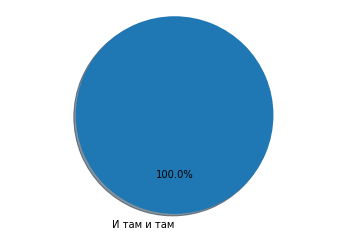

In [25]:

depth_values={}
for p in participants:
    try:
        #print()
        depth_values[p]=participants[p]['depth']
        
    except:
            nothing=2

depth_d=Counter(depth_values.values())

labels = depth_d.keys()
sizes = depth_d.values()
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


(array([16.,  0.,  1.,  0., 22.,  5.,  0.,  3.,  1.,  0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

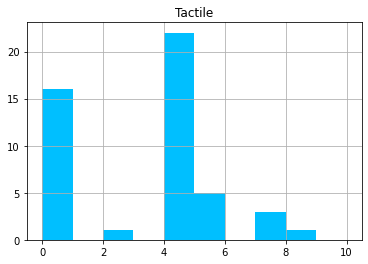

In [51]:
tactile_values={}
for p in participants:
    try:
        tactile_values[p]=participants[p]['maintactileSlider']
    except:
        nothing=2
plt.title('Tactile')
plt.grid()


plt.hist(tactile_values.values(),range=(0,10),color='deepskyblue')

(array([1., 0., 3., 1., 0., 0., 0., 0., 0., 0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

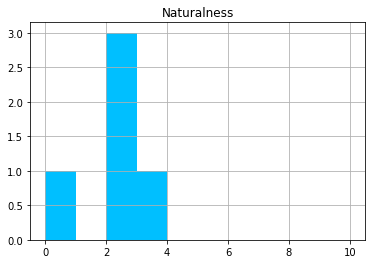

In [29]:
natural_values={}
for p in participants:
    try:
        natural_values[p]=participants[p]['naturalSlider']
    except:
        nothing=2
plt.title('Naturalness')
plt.grid()


plt.hist(natural_values.values(),range=(0,10),color='deepskyblue')

(array([42.,  0.,  1.,  0.,  2.,  0.,  1.,  2.,  0.,  0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

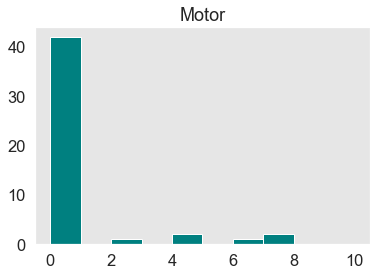

In [74]:
motor_values={}

for p in participants:
    try:
        motor_values[p]=participants[p]['motorSlider']
    except:
        nothing=2

plt.title('Motor')
plt.grid()
plt.hist(motor_values.values(),range=(0,10),color='teal')

(array([47.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

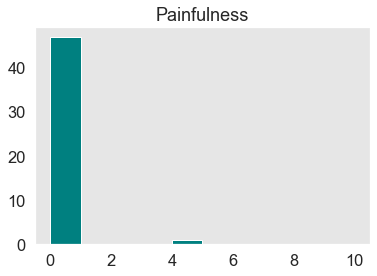

In [73]:
pain_values={}

for p in participants:
    try:
        pain_values[p]=participants[p]['painSlider']
    except:
        nothing=2

plt.title('Painfulness')
plt.grid()
plt.hist(pain_values.values(),range=(0,10),color='teal')

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

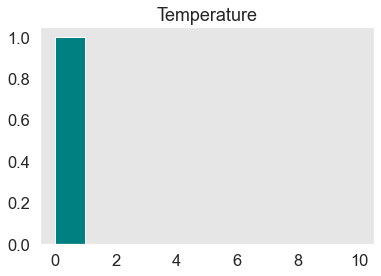

In [75]:
temp_values={}

for p in participants:
    try:
        temp_values[p]=participants[p]['tempSlider']
    except:
        nothing=2

plt.title('Temperature')
plt.grid()
plt.hist(temp_values.values(),range=(0,10),color='teal')

(array([46.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.]),
 array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 <BarContainer object of 10 artists>)

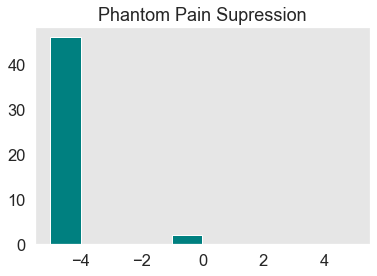

In [78]:
phantom_values={}

for p in participants:
    try:
        phantom_values[p]=participants[p]['phantomSlider']
    except:
        nothing=2

plt.title('Phantom Pain Supression')
plt.grid()
plt.hist(phantom_values.values(),range=(-5,5),color='teal')

### Графики для статьи

In [79]:

sliders=['maintactileSlider','naturalSlider','motorSlider','painSlider','phantomSlider']

title_ru=['Интенсивность тактильного ощущения',
         'Естественно ли было тактильное ощущение?',
         'Насколько заметным было ощущение движениние?',
         'Глубина испытанного ощущение?',
         'Насколько болезненным показалось ощущение?',
         'Как изменилась температура в данной области?',
         'Насколько интенсивна была фантомная боль?']

title_eng=['Intencity of tactile sensation',
         'Naturalness of tactile sensation',
         'Intencity of evoked movement',
         'Depth of sensation',
         'Painfulness of sensation',
         'Change in temperature',
         'Intencity of phantom limb pain']


In [1]:
a=sns.color_palette("Blues", 4,desat=1)

NameError: name 'sns' is not defined

In [108]:
ax1.pie?

In [109]:
labels_ru=labels
labels_eng=['Both']

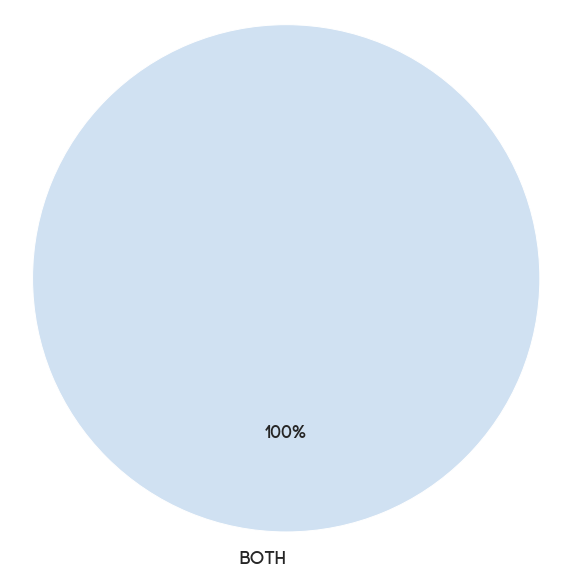

In [110]:
fig1, ax1 = plt.subplots(figsize=[10,10])
ax1.pie(sizes,  labels=labels_eng, autopct='%1.f%%', colors=a,
        startangle=90,textprops={'fontsize': 18, 'family': 'Code Pro',})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.legend(loc='upper left',textprops={'fontsize': 18, 'family': 'Code Pro',})
plt.show()

In [111]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


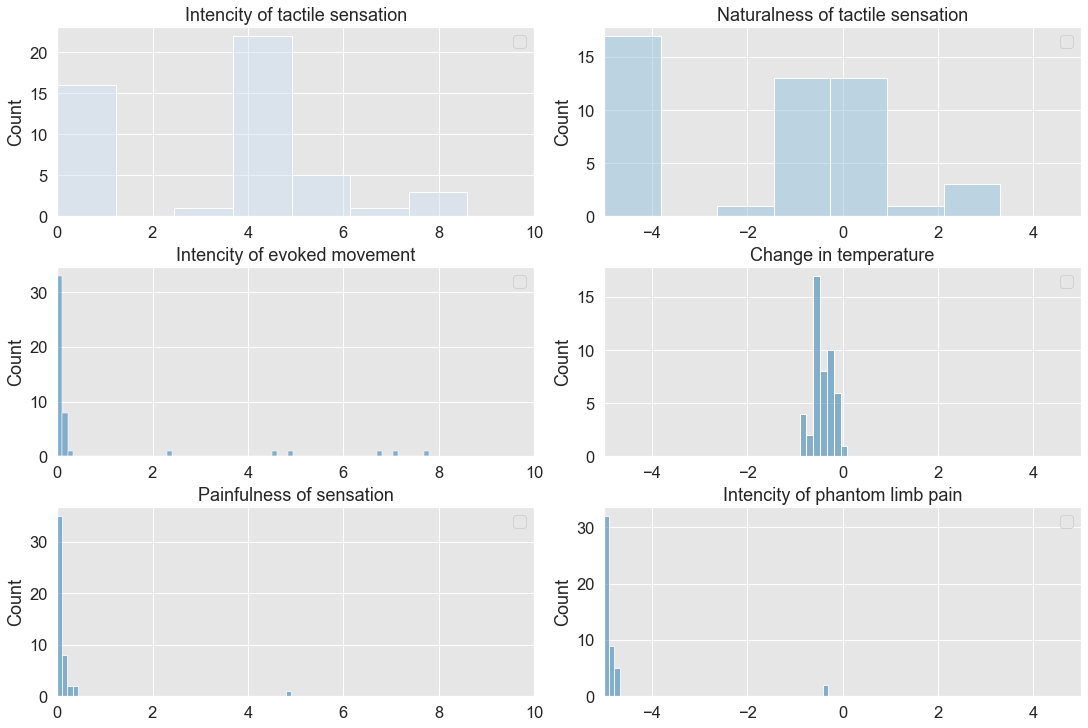

In [105]:
fig,ax =plt.subplots(3,2, figsize=(15, 10), constrained_layout = True)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
#sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
sns.set_style()

a=sns.color_palette("Blues", 4,desat=1)
[a.pop(i) for i in [3,2,1]]
sns.histplot(tactile_values.values(), palette=a,ax=ax[0,0], hue=None)
ax[0,0].set_xlim(0,10)
ax[0,0].set_title('Intencity of tactile sensation')
ax[0,0].legend()
#ax[0,0].set_xlabel('Grade')


a=sns.color_palette("Blues", 4,desat=1)
[a.pop(i) for i in [3,2,0]]
sns.histplot(natural_values.values(), palette=a,ax=ax[0,1], hue=None)
ax[0,1].set_xlim(-5,5)
ax[0,1].set_title('Naturalness of tactile sensation')
ax[0,1].legend()
#ax[0,1].set_xticklabels(['No','Yes'])


a=sns.color_palette("Blues", 4,desat=1)
[a.pop(i) for i in [2,1,0]]
sns.histplot(motor_values.values(),ax=ax[1,0])
ax[1,0].set_xlim(0,10)
ax[1,0].set_title('Intencity of evoked movement',)
ax[1,0].legend()



a=sns.color_palette("Blues", 4,desat=1)
[a.pop(i) for i in [3,1,0]]
sns.histplot(temp_values.values(),ax=ax[1,1])
ax[1,1].set_xlim(-5,5)
ax[1,1].set_title('Change in temperature')
ax[1,1].legend()



a=sns.color_palette("Blues", 4,desat=1)
[a.pop(i) for i in [3,1,0]]
sns.histplot(pain_values.values(),ax=ax[2,0])
ax[2,0].set_xlim(0,10)
ax[2,0].set_title('Painfulness of sensation',)
ax[2,0].legend()



a=sns.color_palette("Blues", 4,desat=1)
[a.pop(i) for i in [3,1,0]]
sns.histplot(phantom_values.values(),ax=ax[2,1])
ax[2,1].set_xlim(-5,5)
ax[2,1].set_title('Intencity of phantom limb pain',)
ax[2,1].legend()




#fig.show()

### Анализ изображений руки

#### Можно выбрать нужный электрод для качественного изображения

67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
Rpalmar.png  ok


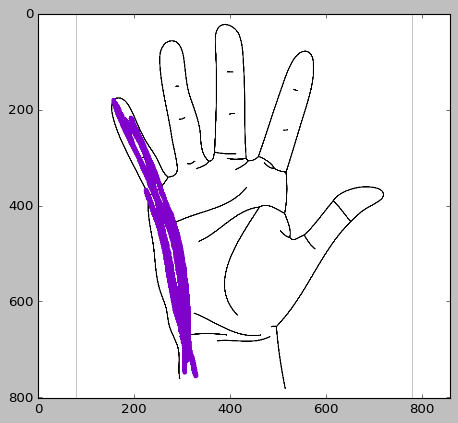

88
Rpalmar.png  ok


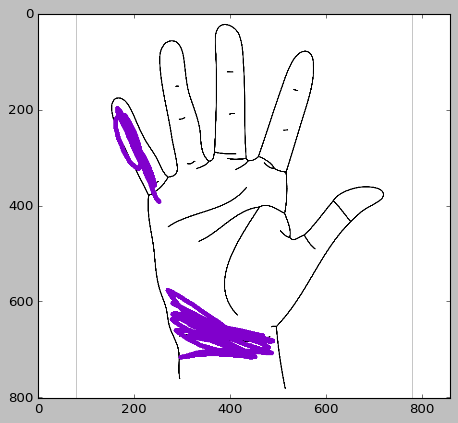

89
Rpalmar.png  ok


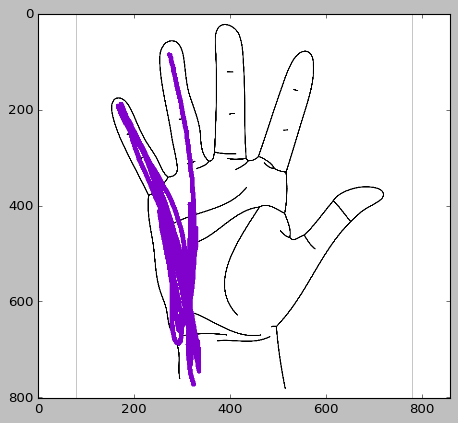

90
Barms.png  ok


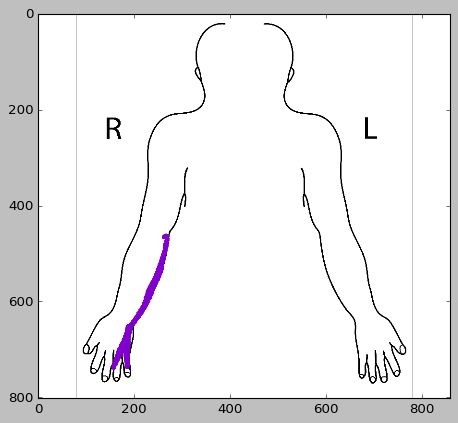

91
Barms.png  ok


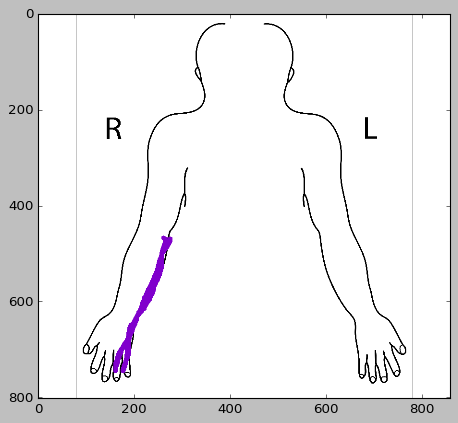

92
Rdorsum.png  ok


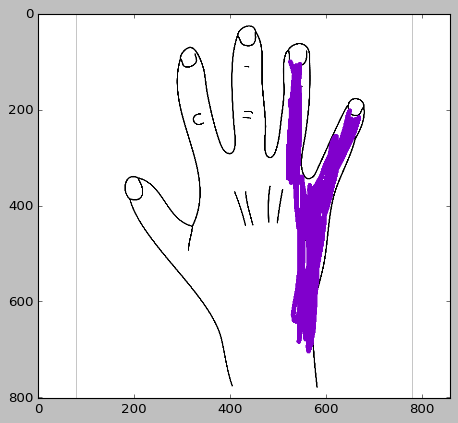

Rpalmar.png  ok


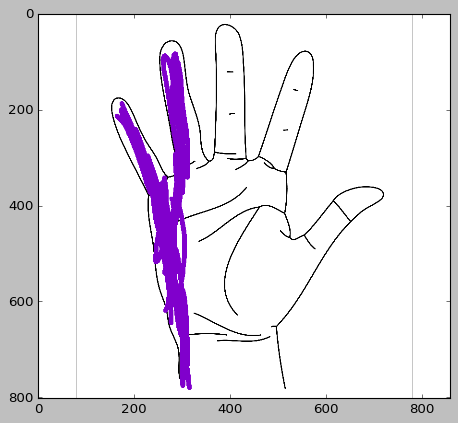

93
Rdorsum.png  ok


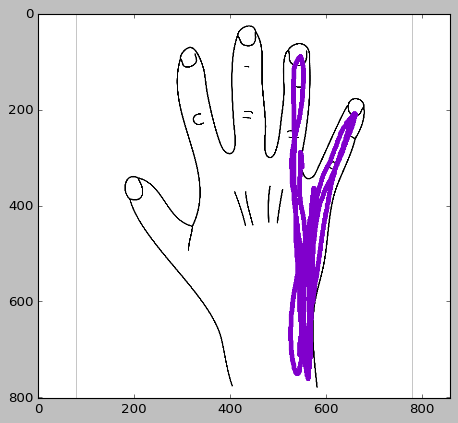

Rpalmar.png  ok


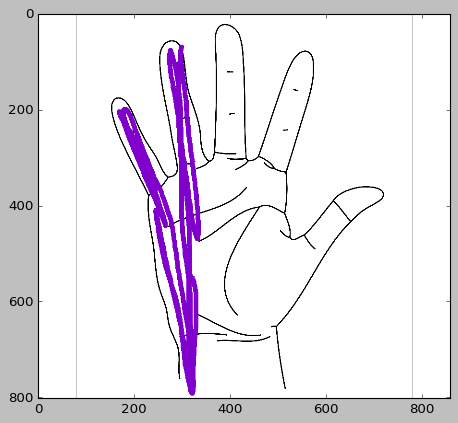

94
Rpalmar.png  ok


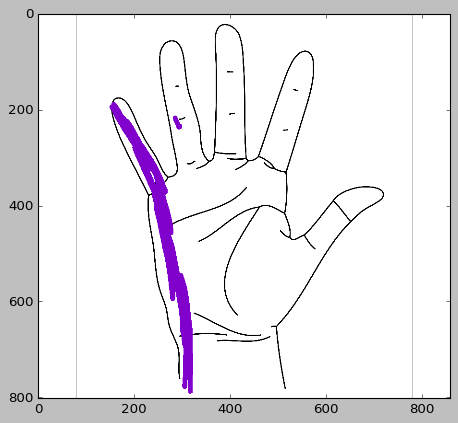

95
Rpalmar.png  ok


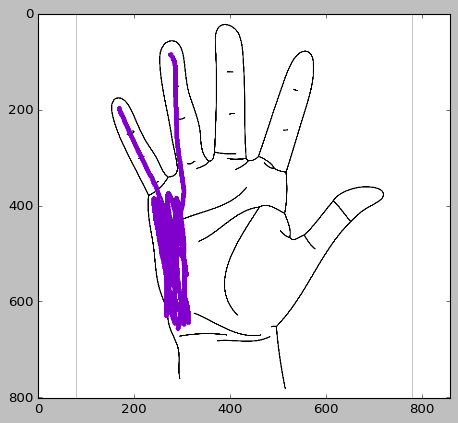

96
Rdorsum.png  ok


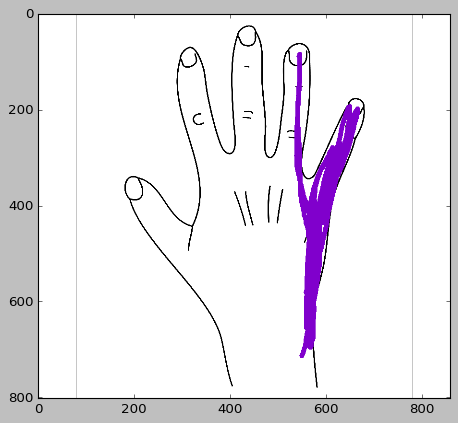

97
Rpalmar.png  ok


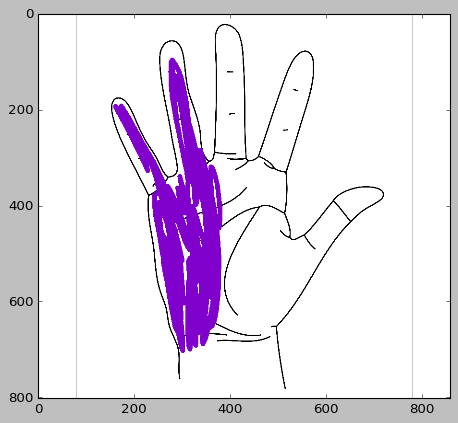

98
Rpalmar.png  ok


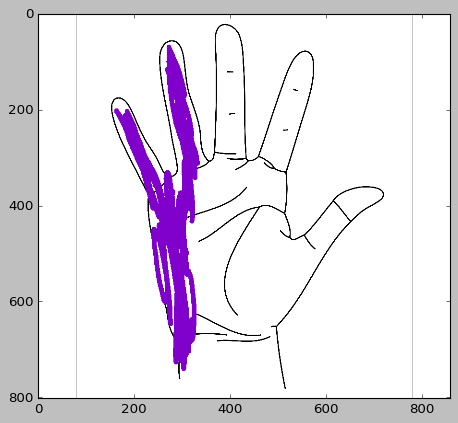

99
Rpalmar.png  ok


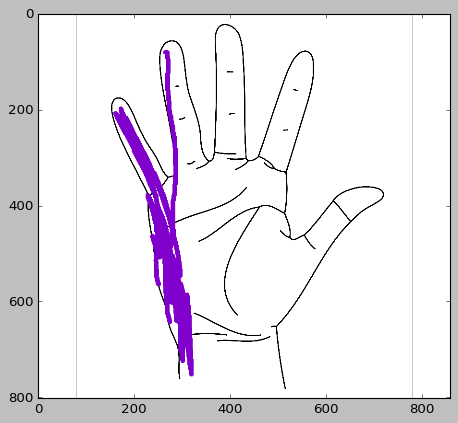

100
Rpalmar.png  ok


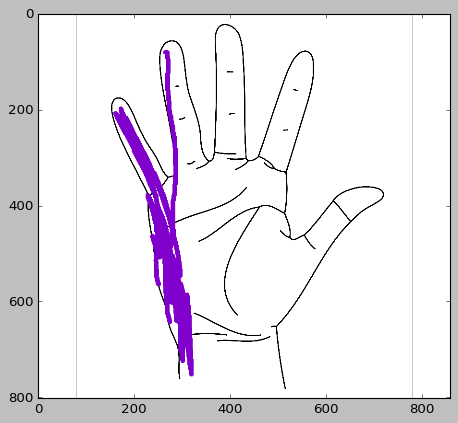

101
Rpalmar.png  ok


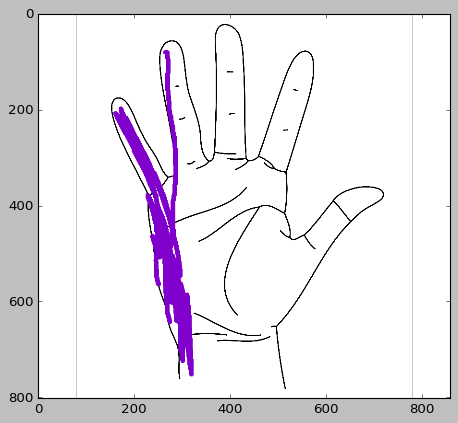

102
Rpalmar.png  ok


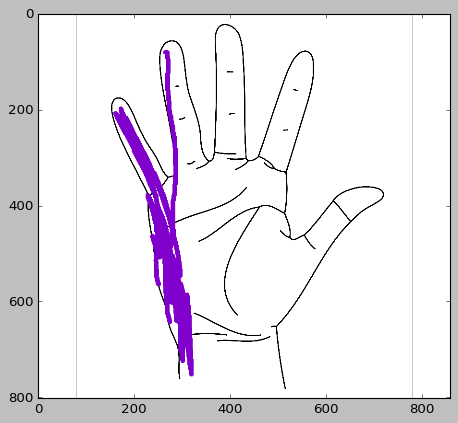

103
Rpalmar.png  ok


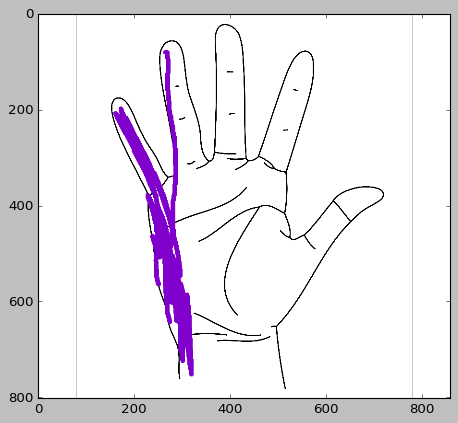

104
Rpalmar.png  ok


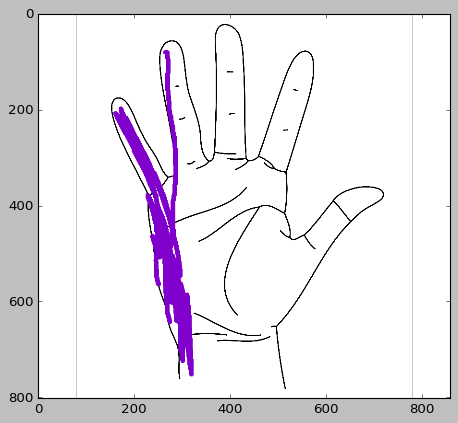

105
Rpalmar.png  ok


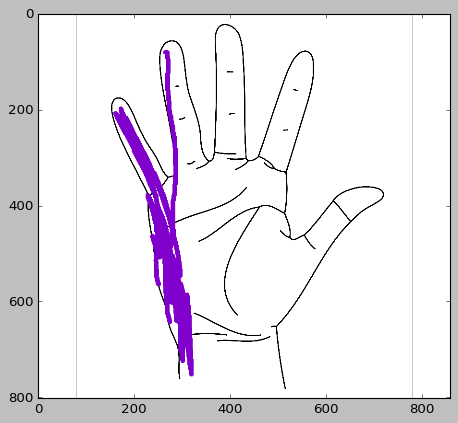

106
Rpalmar.png  ok


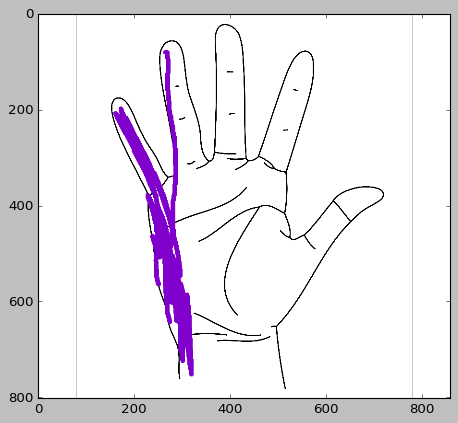

107
Rpalmar.png  ok


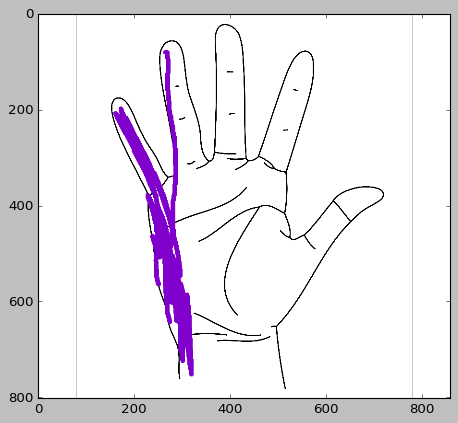

108
Rpalmar.png  ok


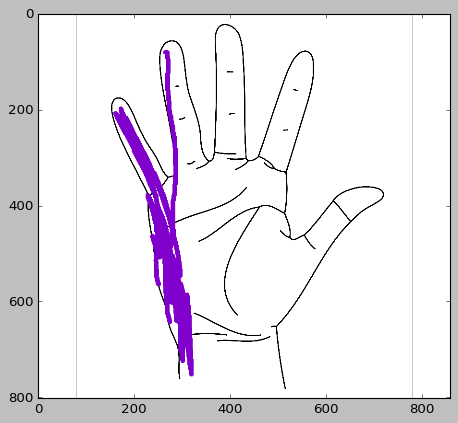

109
Rpalmar.png  ok


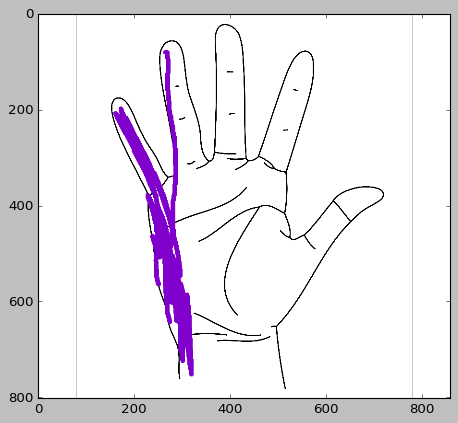

110
Rpalmar.png  ok


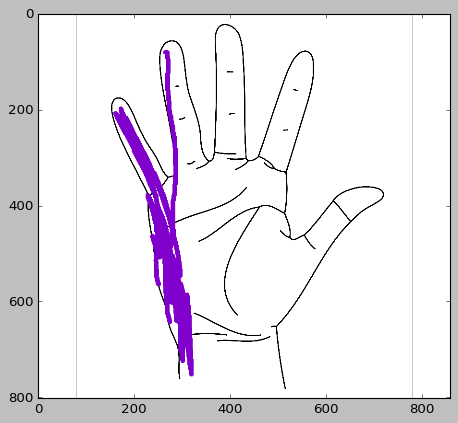

111
Rpalmar.png  ok


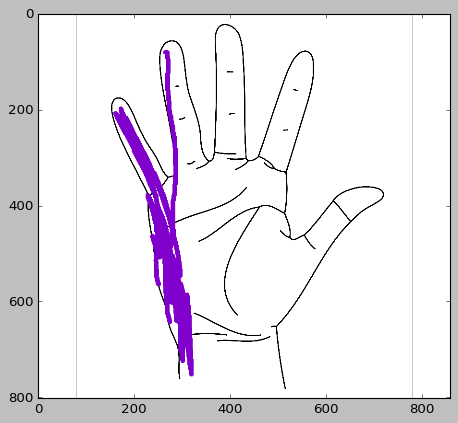

112
Rpalmar.png  ok


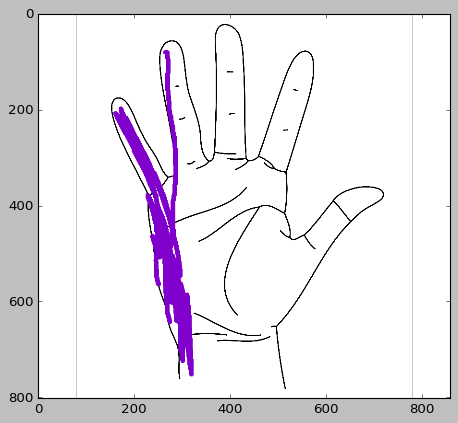

113
Rpalmar.png  ok


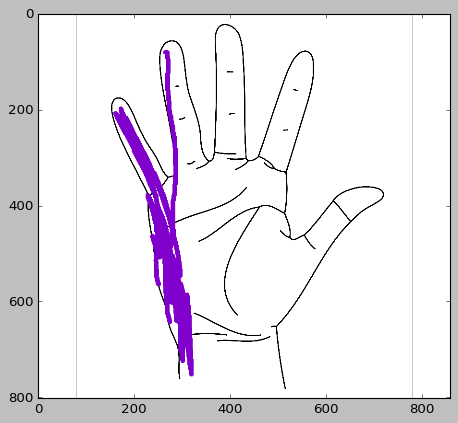

114
Rpalmar.png  ok


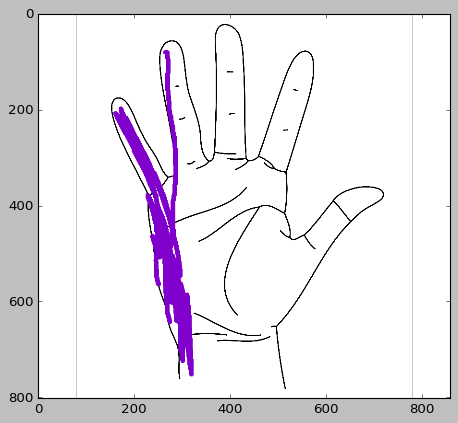

In [133]:
img_list=[]
                     
for i in trials:
    print(i)
    #if i>86:
    #    break
    
    
    if i<=86:
        continue
    
    if i<10:
        ind='00'+str(i)
    elif i<100:
        ind='0'+str(i)
        
    
    for pot in potential_files:
        try:
            img = mpimg.imread(os.getcwd()+'/'+maps_folder+'/'+subj+'/default_R'+ind+'_'+pot)
            print(pot,' ok')
            if pot=='Rpalmar.png':
                img_list.append(img)
            
            plt.imshow(img)
            plt.show()
        except:
            y=0
    
        

In [ ]:
img_array

In [134]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

Размерность  (25, 801, 860, 4)


([], [])

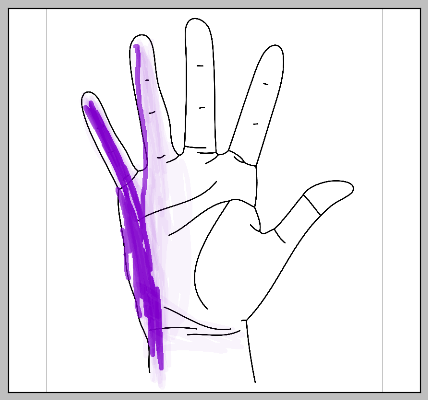

In [156]:
img_array=np.array(img_list)
print('Размерность ', str(img_array.shape))
plt.imshow(np.mean(img_array,0))

plt.grid(False)

# Hide axes ticks
plt.xticks([])
plt.yticks([])

In [157]:
img_list_flatten=[img_list[i].flatten() for i in range(len(img_list))]
from sklearn.decomposition import PCA

pca=PCA(2)
pca_fransforms=pca.fit_transform(img_list_flatten)

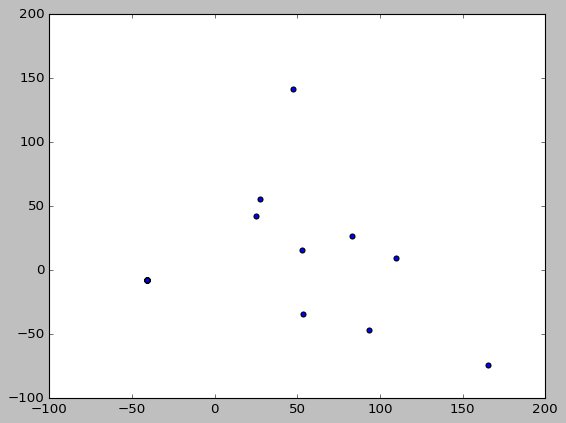

In [158]:
plt.scatter(pca_fransforms[:,0],pca_fransforms[:,1])

In [159]:
from sklearn.cluster import KMeans,SpectralClustering,AgglomerativeClustering

In [160]:
cluster_num=1

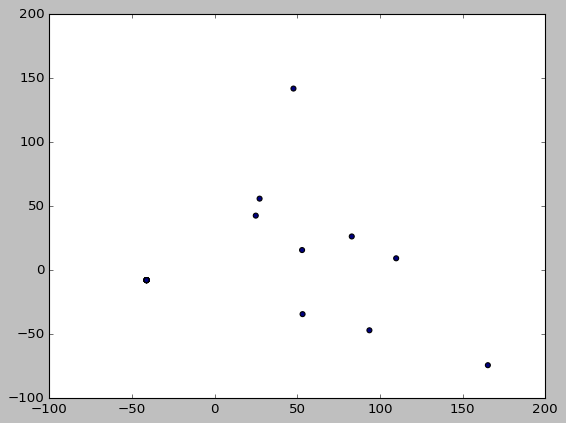

In [161]:
km=AgglomerativeClustering(n_clusters=cluster_num)
clusters=km.fit_predict(pca_fransforms)

plt.scatter(pca_fransforms[:,0],pca_fransforms[:,1],c=clusters)

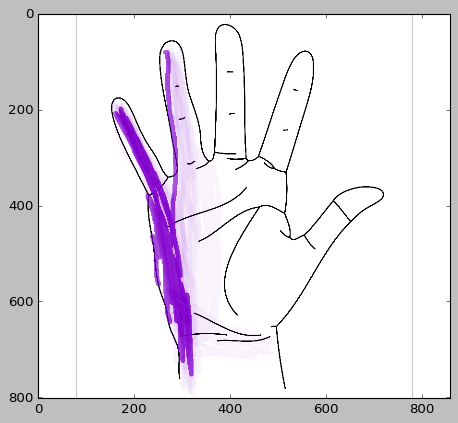

In [162]:
for i in range(cluster_num):

    ind_1=np.where(clusters==i)
    plt.imshow(np.mean(img_array[ind_1],0))
    plt.show()


### Pie chart ощущений

In [31]:
participants={}
all_inds=[]

all_dicts=[]
ind_list=[]

for i in trials:
    try:
        if i<10:
            ind='00'+str(i)
        elif i<100:
            ind='0'+str(i)

        else:
            ind=str(i)
        with open(maps_folder+'/'+subj+'/default_R'+ind+'_RadioCheckSlider.yml') as f:

            data = yaml.load(f, Loader=yaml.FullLoader)

            all_inds=all_inds+list(data['Sensation0'].keys())
            participants[i]=data['Sensation0']

            all_dicts.append(data['Sensation0'])
            ind_list.append(ind)

    except:
        print(i)

In [32]:
main_df=pd.DataFrame.from_dict(all_dicts,orient='columns')
#main_df['ind']=np.arange(i_s,i_e)
main_df['ind']=ind_list
main_df.head()

,depth,electricSlider,flutterSlider,maintactileSlider,motorSlider,naturalSlider,numbSlider,painSlider,phantomSlider,pressureSlider,prickSlider,tempSlider,touchSlider,urgeSlider,vibrationSlider,pulseSlider,itchSlider,tingleSlider,ind
0,И там и там,5.5,3.1,7.3,6.8,-0.1,4.5,0.3,-4.7,7.0,5.0,-0.1,5.6,7.4,8.3,NaN,NaN,NaN,067
1,И там и там,8.1,NaN,0.0,0.1,-5.0,NaN,0.2,-4.9,NaN,4.9,-0.5,NaN,NaN,8.4,NaN,NaN,NaN,068
2,И там и там,8.1,NaN,0.0,0.1,-4.9,5.0,0.0,-4.7,8.1,NaN,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,069
3,И там и там,1.3,5.8,4.8,2.4,-0.3,2.4,0.2,-4.7,2.4,1.3,-0.8,NaN,NaN,7.5,8.2,NaN,NaN,070
4,И там и там,1.5,7.3,0.0,0.0,-4.9,1.3,0.1,-4.8,2.2,3.5,-0.4,NaN,NaN,7.7,7.4,NaN,NaN,071


In [39]:
counts=main_df.copy().drop(['maintactileSlider','naturalSlider','motorSlider','painSlider','phantomSlider','tempSlider','ind'], axis='columns').describe().loc['count']

In [40]:
counts

electricSlider     34.0
flutterSlider      13.0
numbSlider         17.0
pressureSlider     43.0
prickSlider        19.0
touchSlider         8.0
urgeSlider          1.0
vibrationSlider    19.0
pulseSlider        19.0
itchSlider         12.0
tingleSlider        1.0
Name: count, dtype: float64

In [46]:
colors = sns.color_palette('pastel')
colors = sns.color_palette("Blues",15)
#colors = sns.color_palette("Reds",15)

In [130]:
d_eng={'vibrationSlider':'Vibration',
'flutterSlider':'Flutter',
'urgeSlider':'Urge to move',
'touchSlider':'Touch',
'pressureSlider':'Pressure',
'sharpSlider':'Sharp',
'prickSlider':'Prick',
'electricSlider':'Electric',
'shockSlider':'Hit',
'pulseSlider':'Pulse',
'tickleSlider':'Tickle',
'itchSlider':'Itch',
'tingleSlider':'Tingle',
'numbSlider':'Numb',
'warmSlider':'Warm',
'coolSlider':'Cool'}

labels=np.array(list(d_eng.values()))

In [117]:
d_ru={'vibrationSlider':'Вибрация',
'flutterSlider':'Подергивание',
'urgeSlider':'Намерение произвести движение',
'touchSlider':'Прикосновение',
'pressureSlider':'Сдавливание',
'sharpSlider':'Укол',
'prickSlider':'Покалывание',
'electricSlider':'Электрический ток',
'shockSlider':'Удар',
'pulseSlider':'Пульсация',
'tickleSlider':'Щекотка',
'itchSlider':'Зуд',
'tingleSlider':'Пощипывание',
'numbSlider':'Онемение',
'warmSlider':'Тепло',
'coolSlider':'Холод'}

'Vibration'

In [118]:
temp_senses_values=[]
for i in range(len(sliders)):
    try: temp_senses_values.append(counts[sliders[i]])
    except: temp_senses_values.append(0)
temp_senses_values=np.array(temp_senses_values)

In [119]:
temp_senses_values

array([19., 13.,  1.,  8., 43.,  0., 19., 34.,  0., 19.,  0., 12.,  1.,
       17.,  0.,  0.])

In [120]:
sliders=['vibrationSlider',
'flutterSlider',
'urgeSlider',
'touchSlider',
'pressureSlider',
'sharpSlider',
'prickSlider',
'electricSlider',
'shockSlider',
'pulseSlider',
'tickleSlider',
'itchSlider',
'tingleSlider',
'numbSlider',
'warmSlider',
'coolSlider']

sliders=np.array(sliders)

In [121]:
inds=np.where(temp_senses_values!=0)[0]

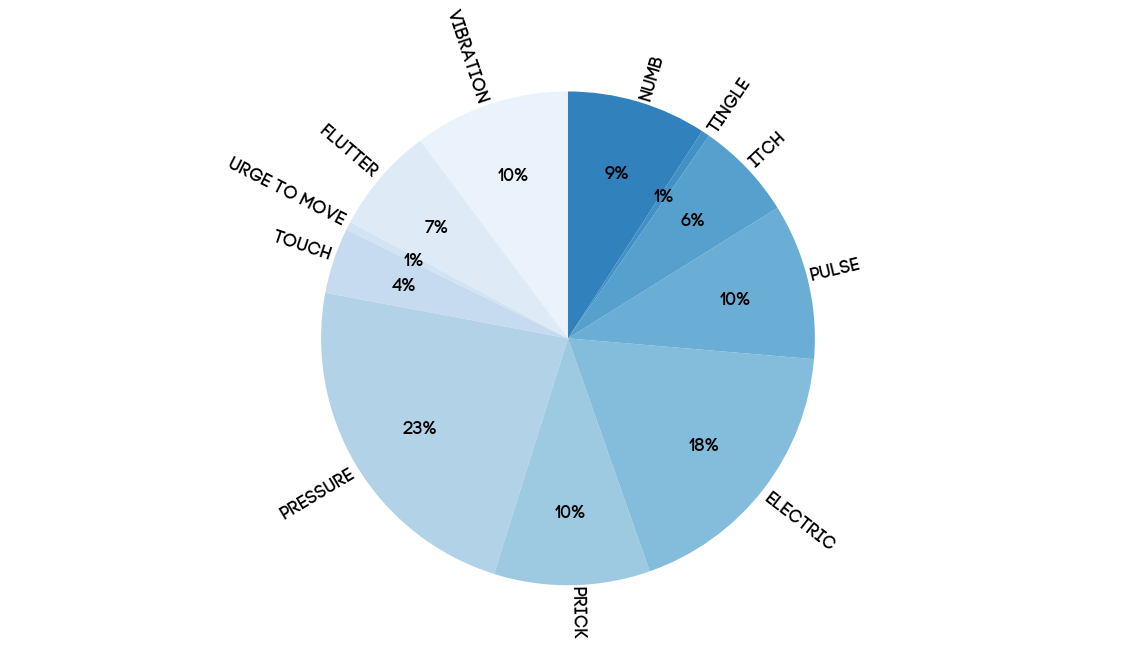

In [131]:

#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=[20,10])
ax1.pie(temp_senses_values[inds],  labels=labels[inds], autopct='%1.f%%', colors=colors, labeldistance=1.0,    pctdistance=0.7, rotatelabels=True,
        startangle=90,textprops={'fontsize': 18, 'family': 'Code Pro',})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.legend(loc='upper left',textprops={'fontsize': 18, 'family': 'Code Pro',})
plt.show()


### Характеристики стимуляции

In [134]:
stimulation_df=pd.read_csv(maps_folder+'/'+stimulation_file,sep='\t')


In [135]:
stimulation_df_clean=stimulation_df[stimulation_df['Image']!='без картинки'][stimulation_df['Image']!='нет']
len(stimulation_df_clean)

/var/folders/2m/6g8qzjcd00n9j42dqh2ndj780000gn/T/ipykernel_4698/1986649311.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stimulation_df_clean=stimulation_df[stimulation_df['Image']!='без картинки'][stimulation_df['Image']!='нет']


48

In [136]:
participants={}
all_inds=[]
for i in trials:
    
    
    if i<10:
        ind='00'+str(i)
    elif i<100:
        ind='0'+str(i)
        
    else:
        ind=str(i)
        
    try:    
        with open(maps_folder+'/'+subj+'/default_R'+ind+'_RadioCheckSlider.yml') as f:

            data = yaml.load(f, Loader=yaml.FullLoader)

            all_inds=all_inds+list(data['Sensation0'].keys())
            participants[i]=data['Sensation0']
    except:
        print(i)

In [137]:
participants={}
all_inds=[]

all_dicts=[]
ind_list=[]

for i in trials:
    try:
        if i<10:
            ind='00'+str(i)
        elif i<100:
            ind='0'+str(i)

        else:
            ind=str(i)
        with open(maps_folder+'/'+subj+'/default_R'+ind+'_RadioCheckSlider.yml') as f:

            data = yaml.load(f, Loader=yaml.FullLoader)

            all_inds=all_inds+list(data['Sensation0'].keys())
            participants[i]=data['Sensation0']

            all_dicts.append(data['Sensation0'])
            ind_list.append(ind)

    except:
        print(i)

In [138]:
main_df=pd.DataFrame.from_dict(all_dicts,orient='columns')
#main_df['ind']=np.arange(i_s,i_e)
main_df.index=ind_list


In [139]:
main_df.index=ind_list

In [140]:
len(stimulation_df_clean)

48

In [141]:
senses_df=main_df.copy().drop(['depth'],axis=1)


In [142]:
senses_df['pulse_width']=stimulation_df_clean['Pulse_width']
senses_df['frequency']=stimulation_df_clean['Frequency']
stimulation_df_clean['Pulse_width'].values.astype('str') 

array(['240', '240', '60', '480', '960', '60', '480', '480', '960', '240',
       '480', '60', '960', '960', '120', '240', '60', '960', '60', '60',
       '240', '240', '60', '480', '960', '60', '480', '480', '120', '960',
       '240', '480', '120', '240', '480', '960', '960', '480', '120',
       '240', '240', '120', '960', '60', '240', '120', '60', '60'],
      dtype='<U21')

In [143]:
#main_df_t=senses_df.apply(lambda x: [0 if math.isnan(x[i]) else 1 for i in range(len(x))])

In [144]:
senses_df['pulse_width']=np.sqrt(stimulation_df_clean['Pulse_width'].values)**2
senses_df['frequency']=np.sqrt(stimulation_df_clean['Frequency'].values)**2

In [145]:
senses_df

,electricSlider,flutterSlider,maintactileSlider,motorSlider,naturalSlider,numbSlider,painSlider,phantomSlider,pressureSlider,prickSlider,tempSlider,touchSlider,urgeSlider,vibrationSlider,pulseSlider,itchSlider,tingleSlider,pulse_width,frequency
067,5.5,3.1,7.3,6.8,-0.1,4.5,0.3,-4.7,7.0,5.0,-0.1,5.6,7.4,8.3,NaN,NaN,NaN,240.0,20.0
068,8.1,NaN,0.0,0.1,-5.0,NaN,0.2,-4.9,NaN,4.9,-0.5,NaN,NaN,8.4,NaN,NaN,NaN,240.0,10.0
069,8.1,NaN,0.0,0.1,-4.9,5.0,0.0,-4.7,8.1,NaN,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,60.0,60.0
070,1.3,5.8,4.8,2.4,-0.3,2.4,0.2,-4.7,2.4,1.3,-0.8,NaN,NaN,7.5,8.2,NaN,NaN,480.0,10.0
071,1.5,7.3,0.0,0.0,-4.9,1.3,0.1,-4.8,2.2,3.5,-0.4,NaN,NaN,7.7,7.4,NaN,NaN,960.0,5.0
072,2.4,4.9,4.5,0.2,-5.0,1.7,0.2,-4.9,2.3,2.2,-0.6,NaN,NaN,8.3,7.7,NaN,NaN,60.0,20.0
073,6.7,3.5,0.3,4.9,-4.9,3.0,0.4,-4.8,7.5,2.4,-0.6,NaN,NaN,7.6,6.7,NaN,NaN,480.0,60.0
074,3.9,3.2,0.1,0.2,-4.9,8.0,0.2,-5.0,6.8,2.3,-0.6,NaN,NaN,4.5,NaN,NaN,NaN,480.0,220.0
075,1.6,0.7,7.9,0.0,2.0,1.7,0.2,-4.8,7.3,1.6,-0.6,7.3,NaN,0.9,NaN,NaN,NaN,960.0,200.0
076,3.0,5.8,0.0,0.2,-5.0,6.4,0.2,-4.7,NaN,1.9,-0.4,NaN,NaN,5.8,7.0,NaN,NaN,240.0,5.0


In [147]:
freqs_sq=np.sort(list(set(senses_df['frequency'])))
freqs_labels=np.sort(list(set(stimulation_df_clean['Frequency'])))

pulse_sq=np.sort(list(set(senses_df['pulse_width'])))
pulse_labels=np.sort(list(set(stimulation_df_clean['Pulse_width'])))

/Users/gurasog/anaconda3/envs/invasive/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

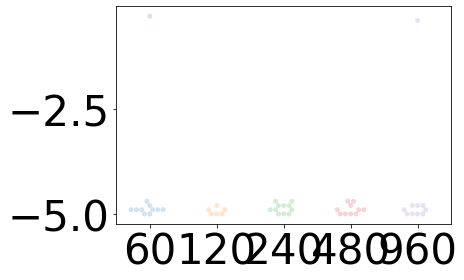

In [176]:
sns.swarmplot(senses_df['pulse_width'].values.astype(int),senses_df[word].values,alpha=0.2)

In [152]:
import matplotlib

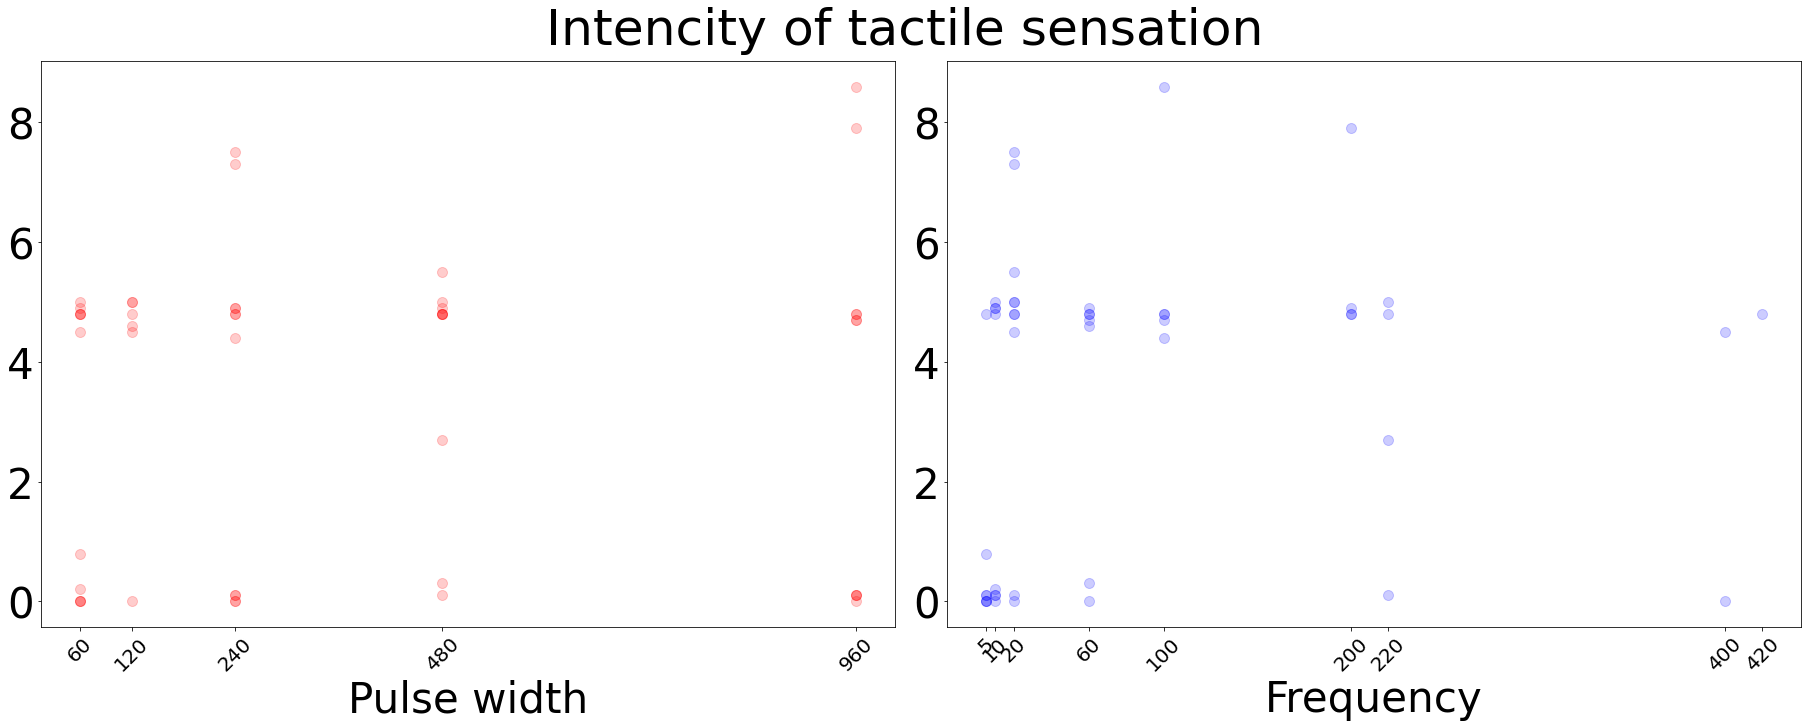

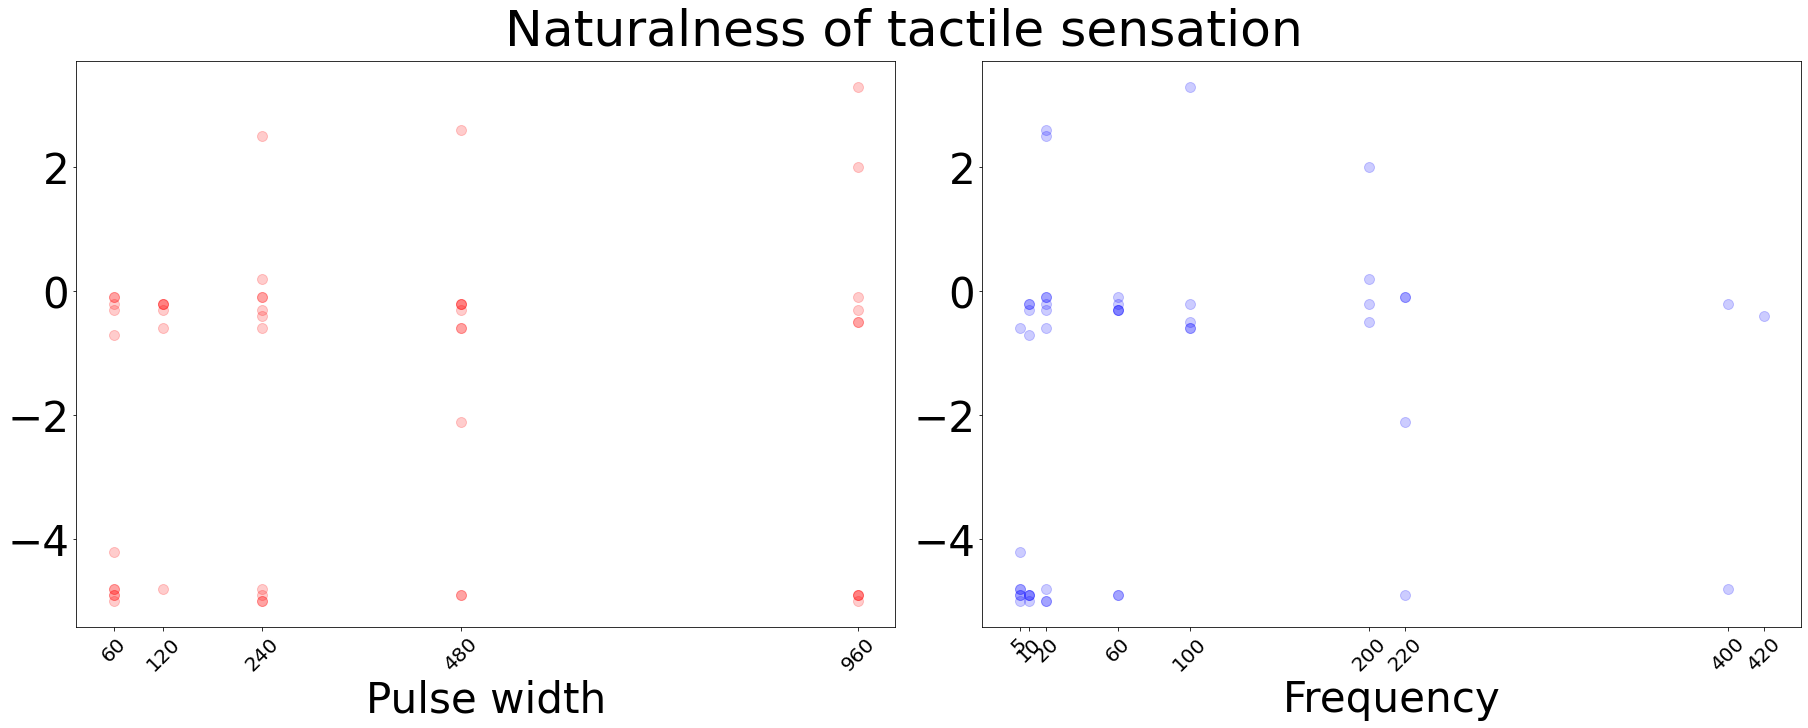

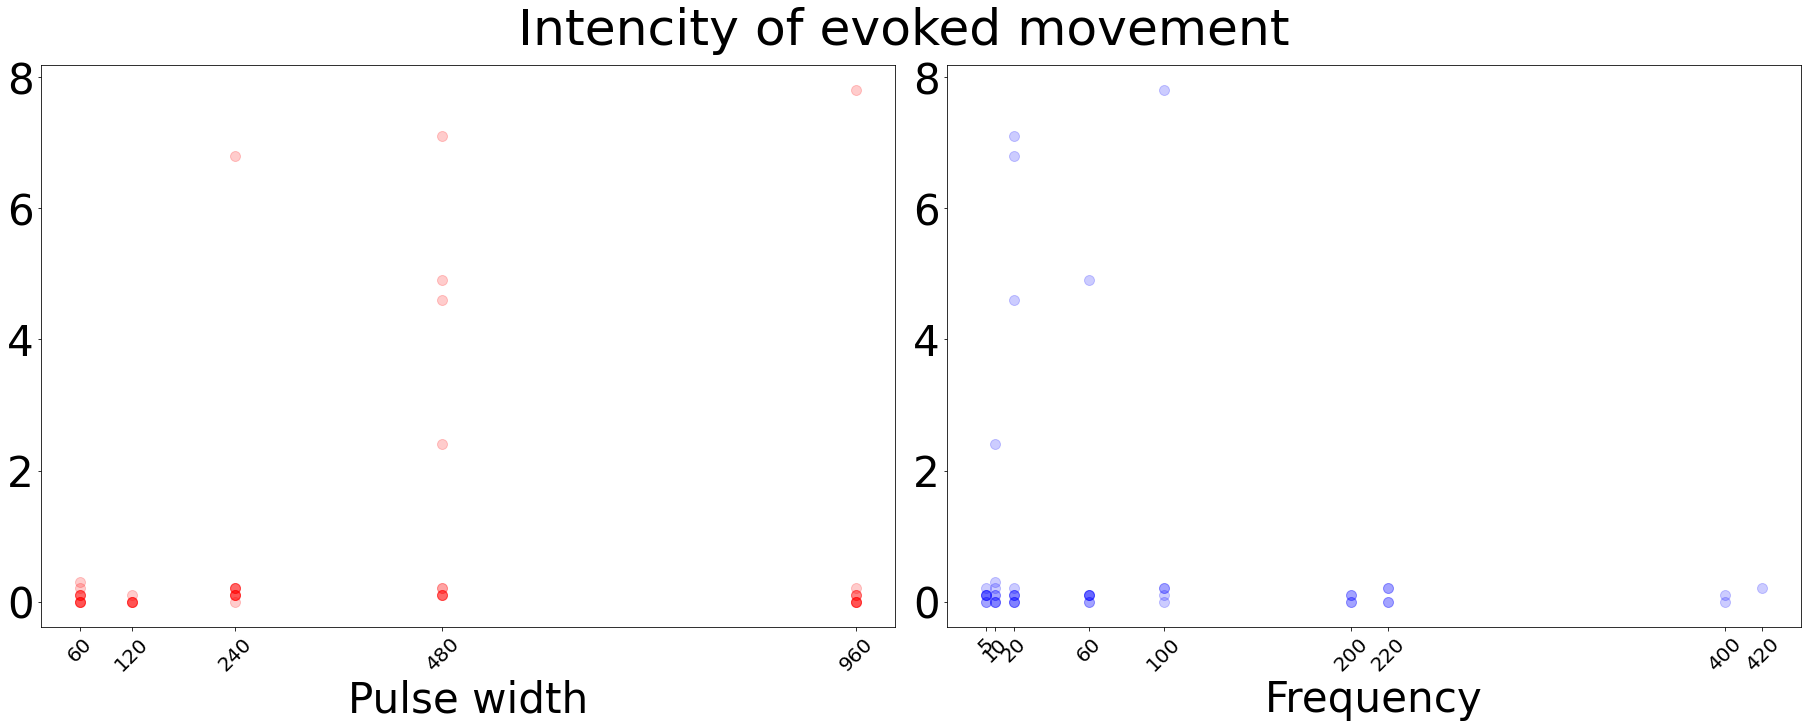

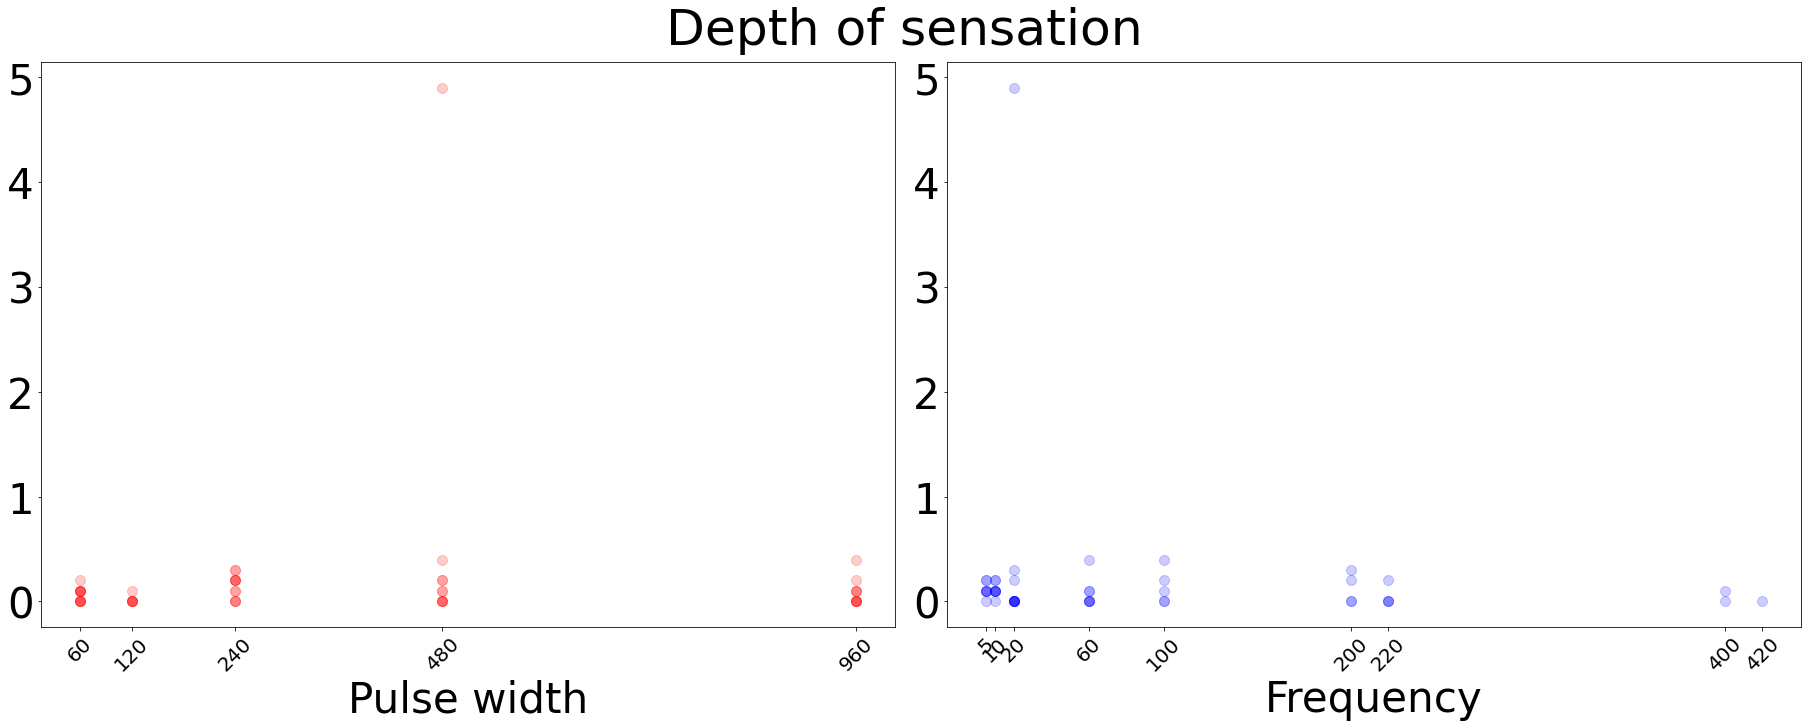

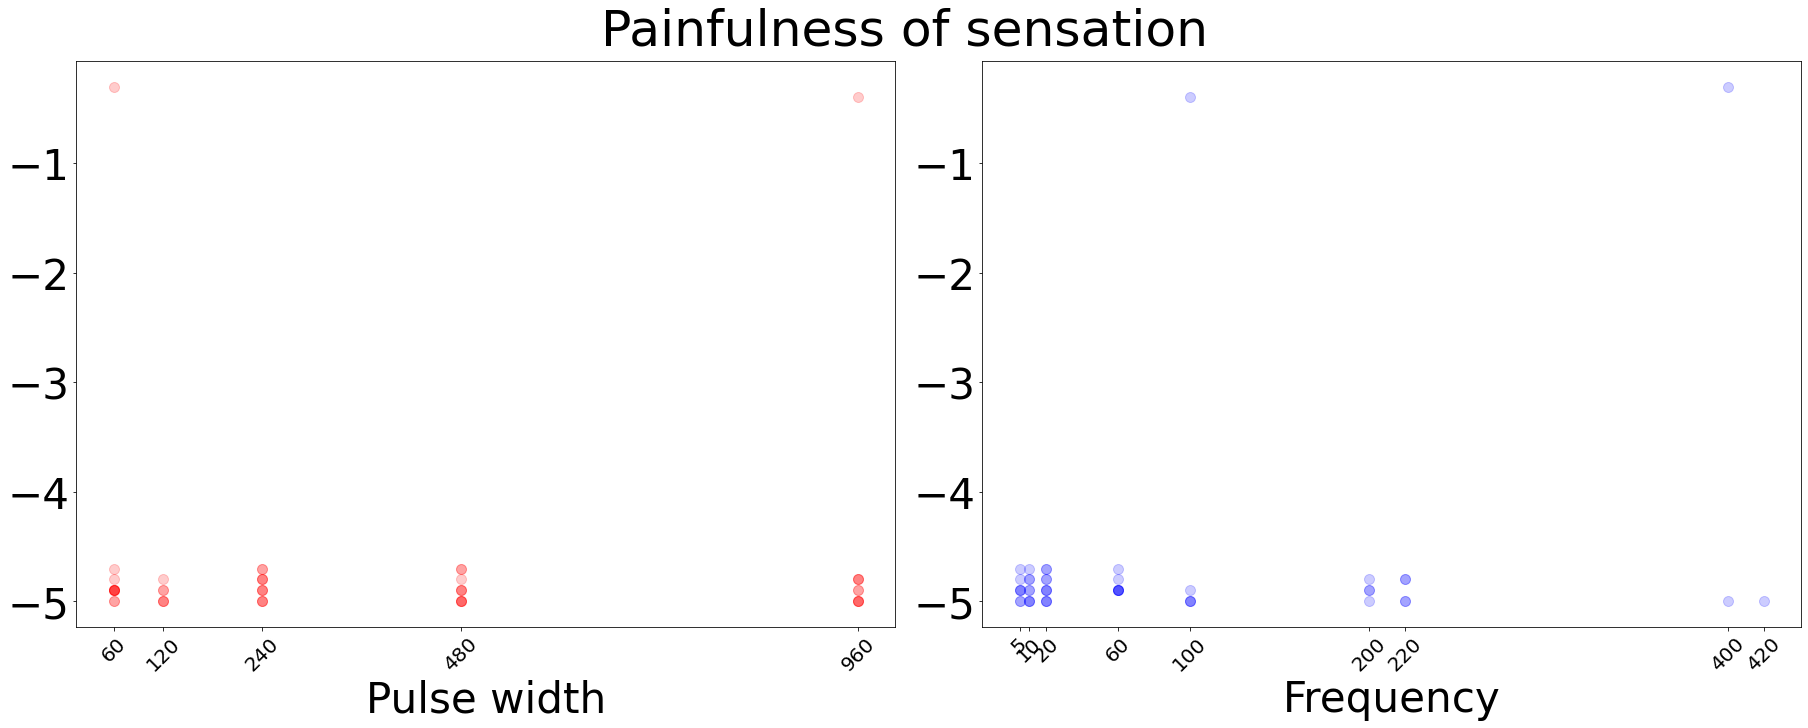

In [188]:
#plt.plot(senses_df['maintactileSlider'].values,senses_df['pulse_width'].values,'o',alpha=0.2)
matplotlib.rcParams.update({'font.size': 42})
sliders=['maintactileSlider','naturalSlider','motorSlider','painSlider','phantomSlider']

title_ru=['Интенсивность тактильного ощущения',
         'Естественно ли было тактильное ощущение?',
         'Насколько заметным было ощущение движениние?',
         'Глубина испытанного ощущение?',
         'Насколько болезненным показалось ощущение?',
         'Как изменилась температура в данной области?',
         'Насколько интенсивна была фантомная боль?']

title_eng=['Intencity of tactile sensation',
         'Naturalness of tactile sensation',
         'Intencity of evoked movement',
         'Depth of sensation',
         'Painfulness of sensation',
         'Change in temperature',
         'Intencity of phantom limb pain']

for i in range(len(sliders)):
    
    fig,ax=plt.subplots(1,2,figsize=(25,10),constrained_layout = True)
    #fig.tight_layout()
    fig.suptitle(title_eng[i],fontdict={'fontsize':60})
    
    word=sliders[i]
    #ax[0].set_title(word)
    ax[0].plot(senses_df['pulse_width'].values,senses_df[word].values,'ro',alpha=0.2,markersize=10)
    ax[0].set_xlabel('Pulse width')
    ax[0].set_xticks(pulse_labels)
    ax[0].set_xticklabels(pulse_labels,rotation=45,fontdict={'fontsize':20})
    
    ax[1].plot(senses_df['frequency'].values,senses_df[word].values,'bo',alpha=0.2,markersize=10)
    ax[1].set_xlabel('Frequency')
    ax[1].set_xticks(freqs_labels)
    ax[1].set_xticklabels(freqs_labels.astype(str),rotation=45,fontdict={'fontsize':20})

    plt.show()

### Связывание ощущения и стимула

In [202]:
senses_df=main_df.copy().drop(['motorSlider','naturalSlider','painSlider','maintactileSlider','phantomSlider','depth'],axis=1)

#senses_df=main_df.copy().drop(['depth'],axis=1)

In [203]:
senses_df

,electricSlider,flutterSlider,numbSlider,pressureSlider,prickSlider,tempSlider,touchSlider,urgeSlider,vibrationSlider,pulseSlider,itchSlider,tingleSlider
067,5.5,3.1,4.5,7.0,5.0,-0.1,5.6,7.4,8.3,NaN,NaN,NaN
068,8.1,NaN,NaN,NaN,4.9,-0.5,NaN,NaN,8.4,NaN,NaN,NaN
069,8.1,NaN,5.0,8.1,NaN,-0.6,NaN,NaN,NaN,NaN,NaN,NaN
070,1.3,5.8,2.4,2.4,1.3,-0.8,NaN,NaN,7.5,8.2,NaN,NaN
071,1.5,7.3,1.3,2.2,3.5,-0.4,NaN,NaN,7.7,7.4,NaN,NaN
072,2.4,4.9,1.7,2.3,2.2,-0.6,NaN,NaN,8.3,7.7,NaN,NaN
073,6.7,3.5,3.0,7.5,2.4,-0.6,NaN,NaN,7.6,6.7,NaN,NaN
074,3.9,3.2,8.0,6.8,2.3,-0.6,NaN,NaN,4.5,NaN,NaN,NaN
075,1.6,0.7,1.7,7.3,1.6,-0.6,7.3,NaN,0.9,NaN,NaN,NaN
076,3.0,5.8,6.4,NaN,1.9,-0.4,NaN,NaN,5.8,7.0,NaN,NaN


In [204]:
senses_df['pulse_width']=stimulation_df_clean['Pulse_width']
senses_df['frequency']=stimulation_df_clean['Frequency']


In [205]:
senses_df

,electricSlider,flutterSlider,numbSlider,pressureSlider,prickSlider,tempSlider,touchSlider,urgeSlider,vibrationSlider,pulseSlider,itchSlider,tingleSlider,pulse_width,frequency
067,5.5,3.1,4.5,7.0,5.0,-0.1,5.6,7.4,8.3,NaN,NaN,NaN,NaN,NaN
068,8.1,NaN,NaN,NaN,4.9,-0.5,NaN,NaN,8.4,NaN,NaN,NaN,NaN,NaN
069,8.1,NaN,5.0,8.1,NaN,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
070,1.3,5.8,2.4,2.4,1.3,-0.8,NaN,NaN,7.5,8.2,NaN,NaN,NaN,NaN
071,1.5,7.3,1.3,2.2,3.5,-0.4,NaN,NaN,7.7,7.4,NaN,NaN,NaN,NaN
072,2.4,4.9,1.7,2.3,2.2,-0.6,NaN,NaN,8.3,7.7,NaN,NaN,NaN,NaN
073,6.7,3.5,3.0,7.5,2.4,-0.6,NaN,NaN,7.6,6.7,NaN,NaN,NaN,NaN
074,3.9,3.2,8.0,6.8,2.3,-0.6,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN
075,1.6,0.7,1.7,7.3,1.6,-0.6,7.3,NaN,0.9,NaN,NaN,NaN,NaN,NaN
076,3.0,5.8,6.4,NaN,1.9,-0.4,NaN,NaN,5.8,7.0,NaN,NaN,NaN,NaN


In [206]:
stimulation_df_clean['Pulse_width'].values.astype('str') 

array(['240', '240', '60', '480', '960', '60', '480', '480', '960', '240',
       '480', '60', '960', '960', '120', '240', '60', '960', '60', '60',
       '240', '240', '60', '480', '960', '60', '480', '480', '120', '960',
       '240', '480', '120', '240', '480', '960', '960', '480', '120',
       '240', '240', '120', '960', '60', '240', '120', '60', '60'],
      dtype='<U21')

In [207]:
main_df_t=senses_df.apply(lambda x: [0 if math.isnan(x[i]) else 1 for i in range(len(x))])

In [212]:
senses_df

,electricSlider,flutterSlider,numbSlider,pressureSlider,prickSlider,tempSlider,touchSlider,urgeSlider,vibrationSlider,pulseSlider,itchSlider,tingleSlider,pulse_width,frequency
067,5.5,3.1,4.5,7.0,5.0,-0.1,5.6,7.4,8.3,NaN,NaN,NaN,NaN,NaN
068,8.1,NaN,NaN,NaN,4.9,-0.5,NaN,NaN,8.4,NaN,NaN,NaN,NaN,NaN
069,8.1,NaN,5.0,8.1,NaN,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
070,1.3,5.8,2.4,2.4,1.3,-0.8,NaN,NaN,7.5,8.2,NaN,NaN,NaN,NaN
071,1.5,7.3,1.3,2.2,3.5,-0.4,NaN,NaN,7.7,7.4,NaN,NaN,NaN,NaN
072,2.4,4.9,1.7,2.3,2.2,-0.6,NaN,NaN,8.3,7.7,NaN,NaN,NaN,NaN
073,6.7,3.5,3.0,7.5,2.4,-0.6,NaN,NaN,7.6,6.7,NaN,NaN,NaN,NaN
074,3.9,3.2,8.0,6.8,2.3,-0.6,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN
075,1.6,0.7,1.7,7.3,1.6,-0.6,7.3,NaN,0.9,NaN,NaN,NaN,NaN,NaN
076,3.0,5.8,6.4,NaN,1.9,-0.4,NaN,NaN,5.8,7.0,NaN,NaN,NaN,NaN


In [208]:
main_df_t['pulse_width']=stimulation_df_clean['Pulse_width']

In [209]:
main_df_t['pulse_width']=stimulation_df_clean['Pulse_width']

In [230]:
main_df_t['pulse_width']=np.sqrt(stimulation_df_clean['Pulse_width'].values)**2
main_df_t['frequency']=np.sqrt(stimulation_df_clean['Frequency'].values)**2

In [231]:
main_df_t

,electricSlider,flutterSlider,numbSlider,pressureSlider,prickSlider,tempSlider,touchSlider,urgeSlider,vibrationSlider,pulseSlider,itchSlider,tingleSlider,pulse_width,frequency
067,1,1,1,1,1,1,1,1,1,0,0,0,240.0,20.0
068,1,0,0,0,1,1,0,0,1,0,0,0,240.0,10.0
069,1,0,1,1,0,1,0,0,0,0,0,0,60.0,60.0
070,1,1,1,1,1,1,0,0,1,1,0,0,480.0,10.0
071,1,1,1,1,1,1,0,0,1,1,0,0,960.0,5.0
072,1,1,1,1,1,1,0,0,1,1,0,0,60.0,20.0
073,1,1,1,1,1,1,0,0,1,1,0,0,480.0,60.0
074,1,1,1,1,1,1,0,0,1,0,0,0,480.0,220.0
075,1,1,1,1,1,1,1,0,1,0,0,0,960.0,200.0
076,1,1,1,0,1,1,0,0,1,1,0,0,240.0,5.0


In [232]:
main_df_t.columns

Index(['electricSlider', 'flutterSlider', 'numbSlider', 'pressureSlider',
       'prickSlider', 'tempSlider', 'touchSlider', 'urgeSlider',
       'vibrationSlider', 'pulseSlider', 'itchSlider', 'tingleSlider',
       'pulse_width', 'frequency'],
      dtype='object')

In [233]:
main_df_t.columns[11]

'tingleSlider'

In [234]:
main_df_t.columns[i]

'itchSlider'

/Users/gurasog/anaconda3/envs/invasive/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurasog/anaconda3/envs/invasive/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gurasog/anaconda3/envs/invasive/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

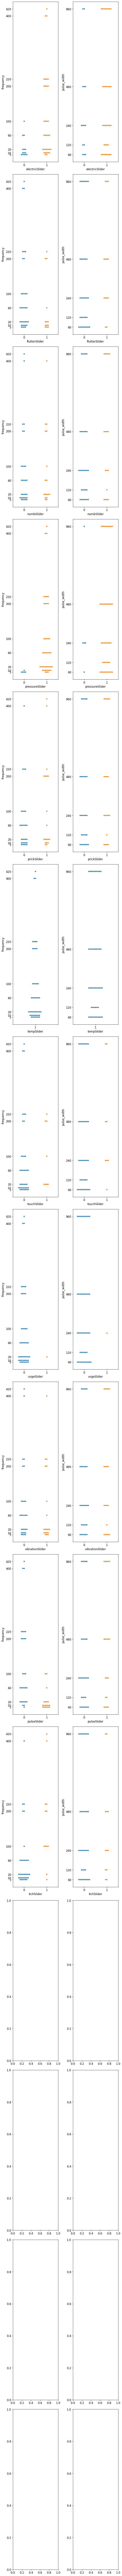

In [242]:
matplotlib.rcParams.update({'font.size': 12})
fig,axs=plt.subplots(15,2, figsize=(7,150),constrained_layout = True)

for i in range(11):
    #sns.swarmplot(main_df_t[main_df_t.columns[i]],main_df['duration'],ax=axs[0,i])
    sns.swarmplot(main_df_t[main_df_t.columns[i]],main_df_t['frequency'],ax=axs[i,0])
    axs[i,0].set_yticks(freqs_labels)
    axs[i,0].set_yticklabels(freqs_labels)
    
    sns.swarmplot(main_df_t[main_df_t.columns[i]],main_df_t['pulse_width'],ax=axs[i,1])
    axs[i,1].set_yticks(pulse_labels)
    axs[i,1].set_yticklabels(pulse_labels)
    

#axs[0,1]=sns.swarmplot(loool,main_df['depth'])
#axs[0,1]=sns.swarmplot(loool,main_df['frequenc'])
#axs.show()

In [ ]:
main_df_t[['pulse_width','frequency','touchSlider']].

In [ ]:
main_df_t[main_df_t['touchSlider','pulse_width']]